In [1]:
import sys,os
sys.path.append(os.path.abspath(".."))

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from Computation_tools.Kraus_Channels import *

In [7]:
def prepare_result(init = "mixed"):
  phi_a = np.arange(-np.pi,np.pi,0.1)
  phi_b = np.arange(-np.pi,np.pi,0.1)
  dim = 5
  out = np.zeros((len(phi_a),len(phi_b)))
  purity = np.zeros((len(phi_a),len(phi_b)))

  for i in range(len(phi_a)):
    for j in range(len(phi_b)):
      model = Kraus_synch(dim,phi_a[i],phi_b[j])
      rho = model.run("ABAB",init = init)
      out[i,j] = rho[0,0]
      purity[i,j] = (rho @ rho).trace()

  x_ticks = [0,len(phi_a)//4,len(phi_a)//2,3*len(phi_a)//4,len(phi_a) - 1]
  x_labels = [r'$-\pi$',r'$-\frac{\pi}{2}$', r'$0$',r'$\frac{\pi}{2}$',r'$\pi$']

  y_ticks = [0,len(phi_a)//4,len(phi_a)//2,3*len(phi_a)//4,len(phi_a) - 1]
  y_labels = [r'$-\pi$',r'$-\frac{\pi}{2}$', r'$0$',r'$\frac{\pi}{2}$',r'$\pi$']

  fig = plt.figure()
  fs = 15

  ax1 = fig.add_subplot(1,2,1)
  im1 = ax1.imshow(out,origin="lower",vmin = 0, vmax = 1)
  ax1.set_xlabel(r"$\varphi_{B}$", fontsize=fs)
  ax1.set_ylabel(r"$\varphi_{A}$", fontsize=fs)
  ax1.set_title(r"$\langle 0|\rho'|0\rangle $", fontsize=fs)

  fig.colorbar(im1,ax = ax1, fraction=0.04, pad=0.15)
  plt.xticks(x_ticks, x_labels, fontsize=fs)
  plt.yticks(y_ticks, y_labels, fontsize=fs)

  ax2 = fig.add_subplot(1,2,2)
  im2 = ax2.imshow(purity,origin="lower",vmin = 0, vmax = 1)
  ax2.set_xlabel(r"$\varphi_{B}$", fontsize=fs)
  ax2.set_ylabel(r"$\varphi_{A}$", fontsize=fs)
  ax2.set_title(r"$tr(\rho'^{2})$", fontsize=fs)

  fig.colorbar(im2,ax = ax2, fraction=0.04, pad=0.15)
  plt.xticks(x_ticks, x_labels, fontsize=fs)
  plt.yticks(y_ticks, y_labels, fontsize=fs)
  plt.tight_layout()

  if init == "mixed":
    name_string = "mixed_fidelity_purity.pdf"
  else:
    name_string = "equally_w_fidelity_purity.pdf"

  plt.savefig(os.path.join(os.path.curdir,"Images",name_string), format="pdf", bbox_inches="tight")
  return name_string

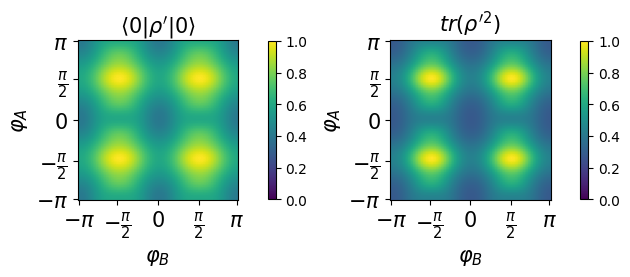

In [8]:
res_mixed = prepare_result(init = "mixed")

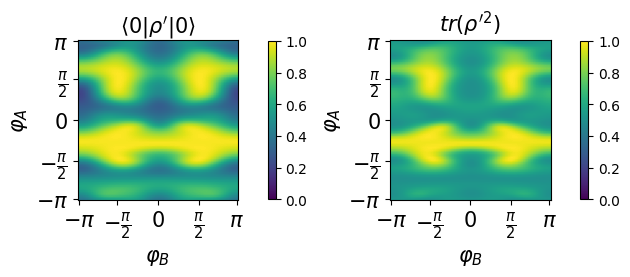

In [9]:
res_equally = prepare_result(init = "equally_weighted")